In [ ]:
# 학습목표
# 이미지를 분류해내는데 뛰어난 성능을 가진 합성곱 신경망 개념과 구성요소에 대해 학습한다.
# 케라스 API로 합성곱 신경망을 만들어 패션MNIST 데이터에서 성능을 평가한다.
# 합성곱 층의 필터와 활성화 출력을 시각화 하여 합성곱 신경망이 학습한 내용을 고찰한다.

In [ ]:
# 합성곱 신경망의 구성요소
# 합성곱이란 마치 입력데이터에 마법의 도장을 찍어 유용한 특성만 나타나게 하는 것으로 비유 가능하다.
# 합성곱신경망에서는 완전연결신경망과 달리 뉴런을 필터 혹은 커널이라고도 불른다. 뉴런=필터=커널

In [ ]:
# 케라스 합성곱 층
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

In [ ]:
# 그렇다면 합성곱 신경망의 정의란?
# 1개 이상의 합성곱 층을 쓴 인공신경망을 합성곱 신경망이라 부른다.

In [ ]:
# 패딩과 스트라이드
# 패딩: 입력 배열의 주위를 가상의 원소로 채우는 것을 패딩이라 한다.
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same')

# 스트라이드: 필터를 이동시키는 것을 스트라이드라고 한다.
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu',
                    padding='same', strides=1)


In [ ]:
# 풀링: 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할이다. 하지만 특성맵의 개수 자체는 줄어들지 않는다.
# 풀링에는 맥스풀링, 에버리지풀링이 있고
# 말 그대로 각 특성 내에서 최대값만 남기고 줄이는 것, 에버리지의 경우 평균값으로 줄이는 것을 의미한다.
keras.layers.MaxPooling2D(2)
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

#CH8-2. 합성곱 신경망을 이용한 이미지 분류

In [ ]:
# Fashion MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [ ]:
# 풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 앞서 합성곱 -> 풀링층 을 만들었다 두번째 합성곱-> 풀링층으로 추가해보기
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 3차원 특성맵을 일자로 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

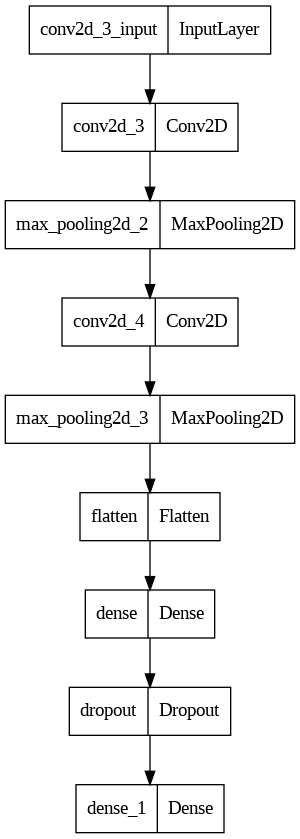

In [ ]:
# 그림으로 표현하기
keras.utils.plot_model(model)

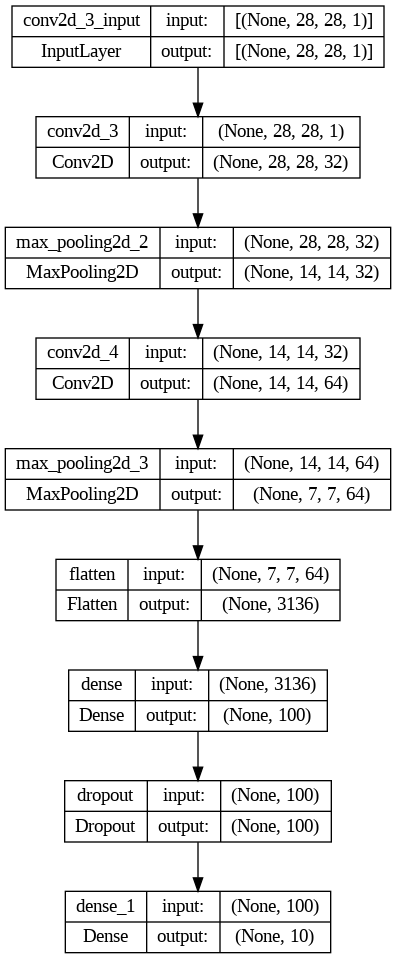

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 85s 56ms/step - loss: 0.5088 - accuracy: 0.8193 - val_loss: 0.3168 - val_accuracy: 0.8816
Epoch 2/20
   1/1500 [..............................] - ETA: 1:44 - loss: 0.3684 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 85s 57ms/step - loss: 0.3327 - accuracy: 0.8800 - val_loss: 0.2779 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2838 - accuracy: 0.8973 - val_loss: 0.2579 - val_accuracy: 0.9034
Epoch 4/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2560 - accuracy: 0.9068 - val_loss: 0.2312 - val_accuracy: 0.9153
Epoch 5/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2326 - accuracy: 0.9139 - val_loss: 0.2234 - val_accuracy: 0.9178
Epoch 6/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2141 - accuracy: 0.9219 - val_loss: 0.2293 - val_accuracy: 0.9173
Epoch 7/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.1975 - accuracy: 0.9279 - val_loss: 0.2215 - val_accuracy: 0.9187
Epoch 8/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1798 - accuracy: 0.9332 - val_loss: 0.2323 - val_accura

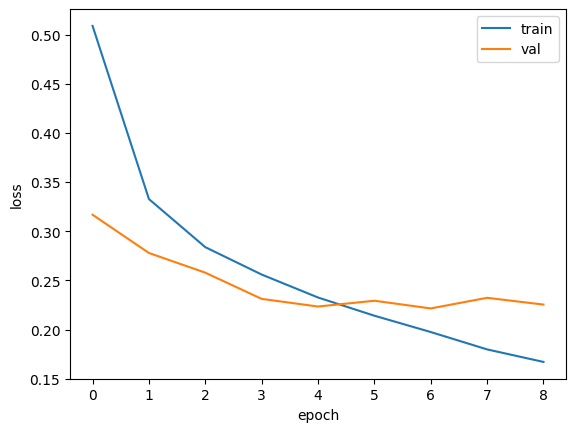

In [ ]:
# 그래프로 확인하기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 검증데이터 실험
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.2215 - accuracy: 0.9187


[0.22150008380413055, 0.918666660785675]

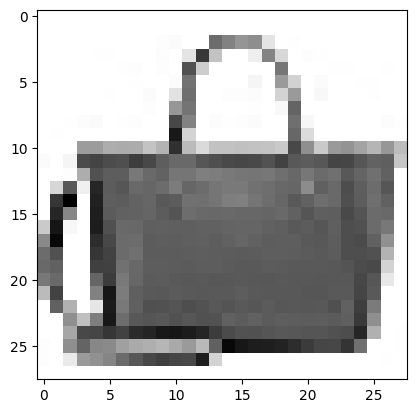

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
# 해당 값이 핸드백이 맞는지 검증해보기
# 결과표를 사려보면 9번째 class 값이 0으로 강하게 주장되고 있다.
# 9번은 핸드백이다.
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 294ms/step
[[6.6466946e-14 1.8572557e-20 2.5015048e-16 2.0030741e-15 1.4844853e-17
  6.4405971e-15 3.2967568e-16 4.0335431e-16 1.0000000e+00 1.9234517e-15]]


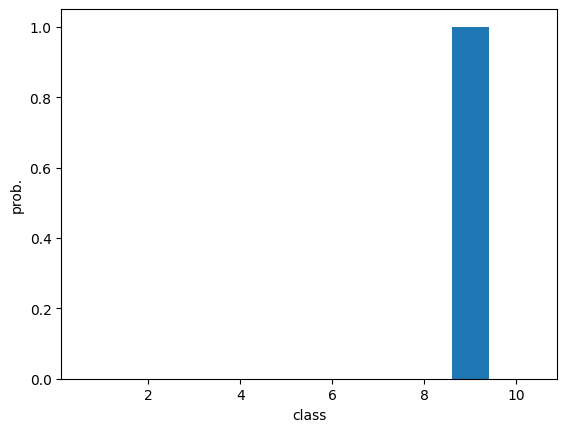

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
# 테스트세트 성능측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2408 - accuracy: 0.9133


[0.24078220129013062, 0.9132999777793884]